<a href="https://colab.research.google.com/github/TMhdSofyan/Unsupervised_Learning/blob/main/01_UpdateProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.9 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=ade6fb0ca9018a8703f1189ac2dc35dc2e96e3f650d108606b25b642a72b0cc2
  Stored in directory: /root/.cache/pip/wheels/a6/1c/91/32f7a6b0a9d6bbcef17a7fc0d065f9a9b8d9904551b377b64d
Successfully built jcopml


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Newdata_Pete590.csv')
df.head()

,DEPTH,FZI,CGR,DRHO,DT5,GR,HNPO,LLD,LLHR,LLS,MRES,MSFC,NPHI,NPOR,POTA,RHOB,SP,THOR,URAN
0,2410.08,211.121914,31.992576,0.034071,86.073454,47.128474,0.184824,1.484896,1.989065,1.370871,0.067983,1.299775,0.179966,0.179166,1.292815,2.376139,4.092643,2.646898,2.012321
1,2410.20,288.431455,31.976041,0.025724,86.340619,48.285009,0.183564,1.479856,1.984340,1.344729,0.067904,1.278673,0.184376,0.181292,1.281476,2.365824,3.945005,2.688867,1.995077
2,2410.39,274.592462,36.236242,0.009850,87.020905,50.670716,0.181900,1.491390,1.827785,1.336755,0.067821,1.246173,0.187421,0.179666,1.476265,2.335299,4.080146,2.949177,1.992421
3,2410.60,497.852972,42.122592,0.003631,87.951610,53.894521,0.173462,1.559632,1.893686,1.371531,0.067900,1.095846,0.185625,0.182018,1.743465,2.322451,4.771490,3.316663,1.904021
4,2410.82,184.453837,42.361279,0.014313,88.442537,54.477657,0.188333,1.590263,2.136641,1.372559,0.067900,1.328147,0.184468,0.185889,1.781504,2.329119,4.248235,3.220796,1.711496


In [5]:
df.describe()

,DEPTH,FZI,CGR,DRHO,DT5,GR,HNPO,LLD,LLHR,LLS,MRES,MSFC,NPHI,NPOR,POTA,RHOB,SP,THOR,URAN
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,2428.359057,456.224651,45.024872,0.026687,80.306421,55.623111,0.154084,2.199655,2.912141,2.081772,0.067091,2.450155,0.151012,0.153865,1.548277,2.424941,2.174896,4.829705,1.663656
std,10.730660,400.791802,24.695799,0.013808,3.967383,26.471878,0.038952,1.688266,2.730197,1.666483,0.000481,2.721835,0.039620,0.038409,0.795357,0.081100,1.507371,3.154398,1.194522
min,2410.080000,4.503497,14.161406,0.000285,73.306692,27.676605,0.086823,1.075735,1.151446,0.878654,0.066300,0.870016,0.084174,0.086485,0.186907,2.183371,-1.564138,1.749333,0.122274
25%,2419.010000,54.033758,27.581358,0.018462,77.275580,36.614972,0.128285,1.250791,1.525993,1.052103,0.066700,1.082979,0.123208,0.127655,0.970231,2.367539,1.307288,2.606146,0.766279
50%,2428.095000,364.007985,35.421470,0.024900,80.108254,47.948590,0.149612,1.488671,1.700839,1.323578,0.067100,1.309856,0.150578,0.149676,1.352433,2.409563,1.722031,3.111152,1.373968
75%,2437.650000,780.286831,60.317010,0.033231,82.086147,68.430302,0.173536,2.611559,3.128704,2.460139,0.067500,2.451143,0.171290,0.171760,2.012678,2.461645,3.769162,6.570513,2.161793
max,2446.600000,1536.150361,123.352332,0.094249,95.135066,138.581176,0.336309,10.035103,17.122944,9.043026,0.067983,16.751086,0.348742,0.340156,3.859390,2.669242,4.921527,15.291887,5.315701


array([[<Axes: title={'center': 'DEPTH'}>,
        <Axes: title={'center': 'FZI'}>, <Axes: title={'center': 'CGR'}>,
        <Axes: title={'center': 'DRHO'}>],
       [<Axes: title={'center': 'DT5'}>, <Axes: title={'center': 'GR'}>,
        <Axes: title={'center': 'HNPO'}>,
        <Axes: title={'center': 'LLD'}>],
       [<Axes: title={'center': 'LLHR'}>,
        <Axes: title={'center': 'LLS'}>,
        <Axes: title={'center': 'MRES'}>,
        <Axes: title={'center': 'MSFC'}>],
       [<Axes: title={'center': 'NPHI'}>,
        <Axes: title={'center': 'NPOR'}>,
        <Axes: title={'center': 'POTA'}>,
        <Axes: title={'center': 'RHOB'}>],
       [<Axes: title={'center': 'SP'}>, <Axes: title={'center': 'THOR'}>,
        <Axes: title={'center': 'URAN'}>, <Axes: >]], dtype=object)

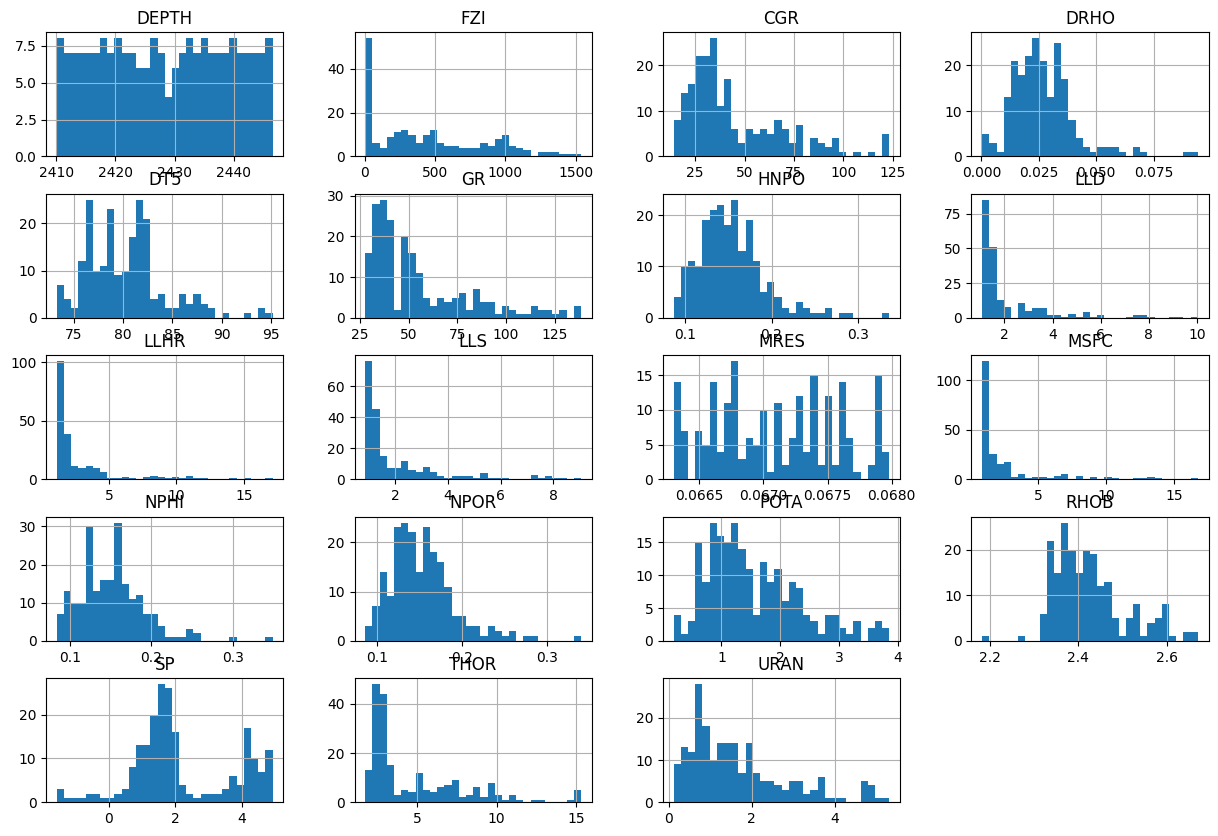

In [6]:
# more detailed look at the Univariate plots
df.hist(bins=30, figsize=(15,10))

In [7]:
from sklearn.preprocessing import PowerTransformer

In [13]:
df = df.drop(columns = ['DEPTH', 'DRHO', 'DT5', 'GR', 'HNPO', 'LLD',
                         'LLS', 'MRES', 'MSFC', 'POTA', 'RHOB', 'SP',
                         'URAN'])

In [14]:
pt = PowerTransformer(method='yeo-johnson')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FZI     212 non-null    float64
 1   CGR     212 non-null    float64
 2   LLHR    212 non-null    float64
 3   NPHI    212 non-null    float64
 4   NPOR    212 non-null    float64
 5   THOR    212 non-null    float64
dtypes: float64(6)
memory usage: 10.1 KB


In [15]:
pt.fit(df[df])

ValueError: ignored

In [ ]:
df[df2] = pt.transform(df[df2])

array([[<Axes: title={'center': 'CGR'}>, <Axes: title={'center': 'DT5'}>,
        <Axes: title={'center': 'GR'}>],
       [<Axes: title={'center': 'LLD'}>,
        <Axes: title={'center': 'NPHI'}>,
        <Axes: title={'center': 'RHOB'}>],
       [<Axes: title={'center': 'SP'}>, <Axes: title={'center': 'FZI'}>,
        <Axes: >]], dtype=object)

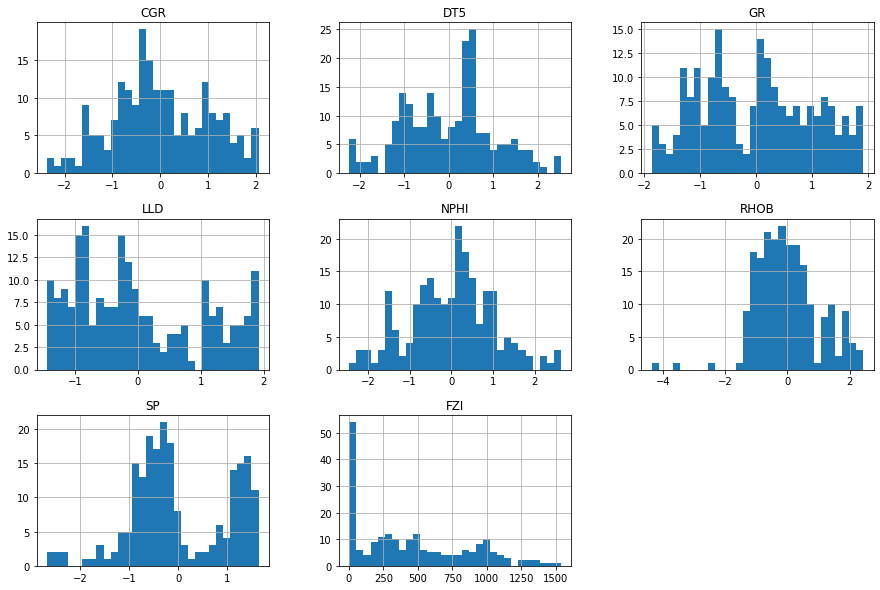

In [ ]:
# more detailed look at the Univariate plots
df.hist(bins=30, figsize=(15,10))

In [7]:
X = df.drop(columns="FZI")
y = df.FZI

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
     

((148, 18), (64, 18), (148,), (64,))

array([[<Axes: title={'center': 'DEPTH'}>,
        <Axes: title={'center': 'CGR'}>,
        <Axes: title={'center': 'DRHO'}>,
        <Axes: title={'center': 'DT5'}>],
       [<Axes: title={'center': 'GR'}>, <Axes: title={'center': 'HNPO'}>,
        <Axes: title={'center': 'LLD'}>,
        <Axes: title={'center': 'LLHR'}>],
       [<Axes: title={'center': 'LLS'}>,
        <Axes: title={'center': 'MRES'}>,
        <Axes: title={'center': 'MSFC'}>,
        <Axes: title={'center': 'NPHI'}>],
       [<Axes: title={'center': 'NPOR'}>,
        <Axes: title={'center': 'POTA'}>,
        <Axes: title={'center': 'RHOB'}>, <Axes: title={'center': 'SP'}>],
       [<Axes: title={'center': 'THOR'}>,
        <Axes: title={'center': 'URAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

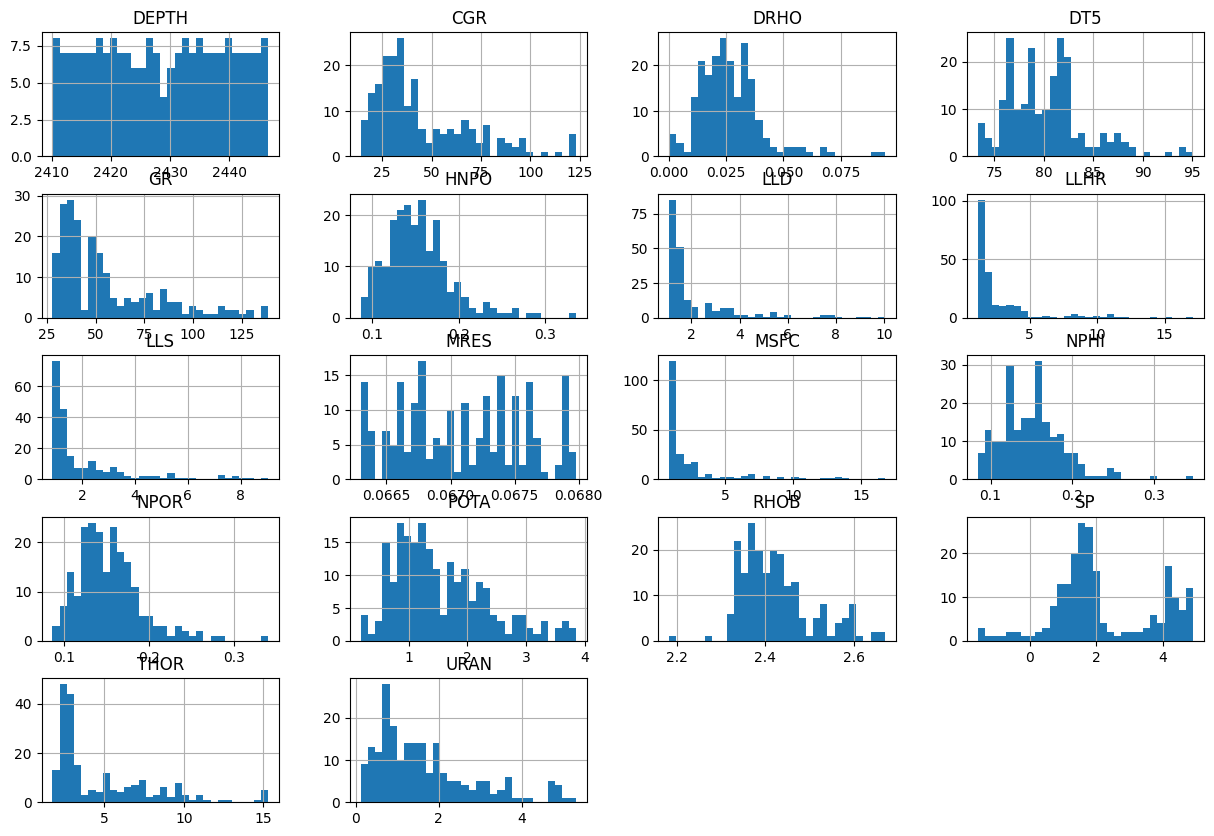

In [8]:
# more detailed look at the Univariate plots
X.hist(bins=30, figsize=(15,10))

In [9]:

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error
     

In [10]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', transform= 'yeo-johnson' , poly = 3), X.columns )])


from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=3, n_iter=50,  n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))
     

/usr/local/lib/python3.9/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.9/dist-packages/

{'algo__max_depth': 27, 'algo__max_features': 0.10496990541124217, 'algo__min_samples_leaf': 11, 'algo__n_estimators': 180, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.8449871195055104 0.7064965234030044 0.7473597144645122


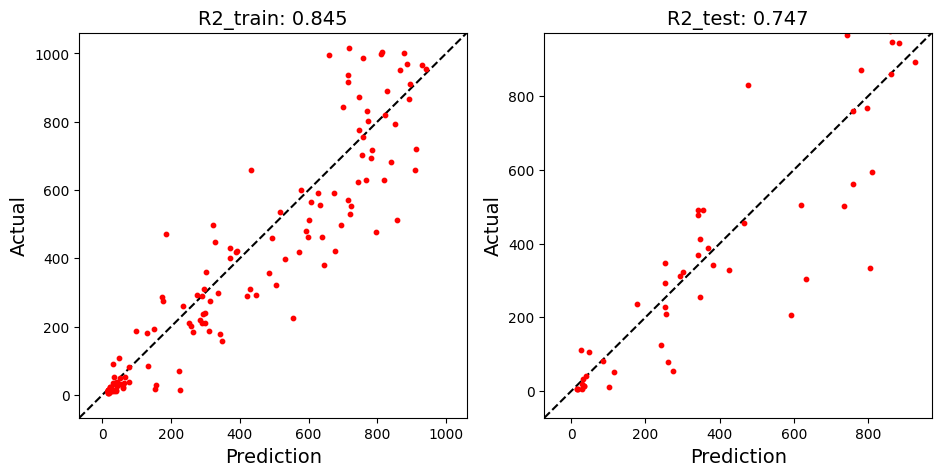

In [11]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_RF)

In [23]:
from jcopml.feature_importance import mean_loss_decrease, mean_score_decrease

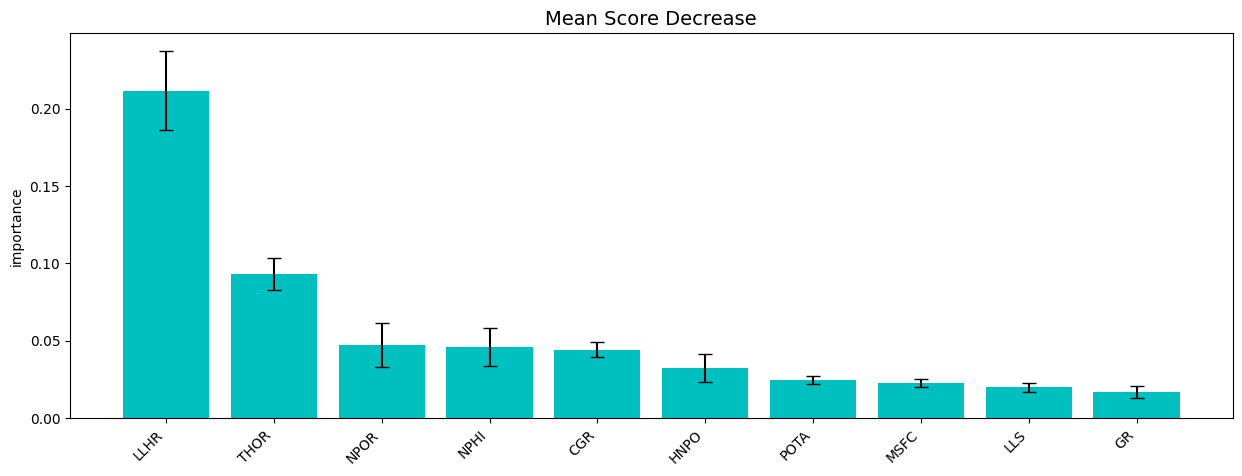

In [28]:
df_imp = mean_score_decrease(X_train, y_train, model_RF, plot=True, topk = 10)

<Axes: >

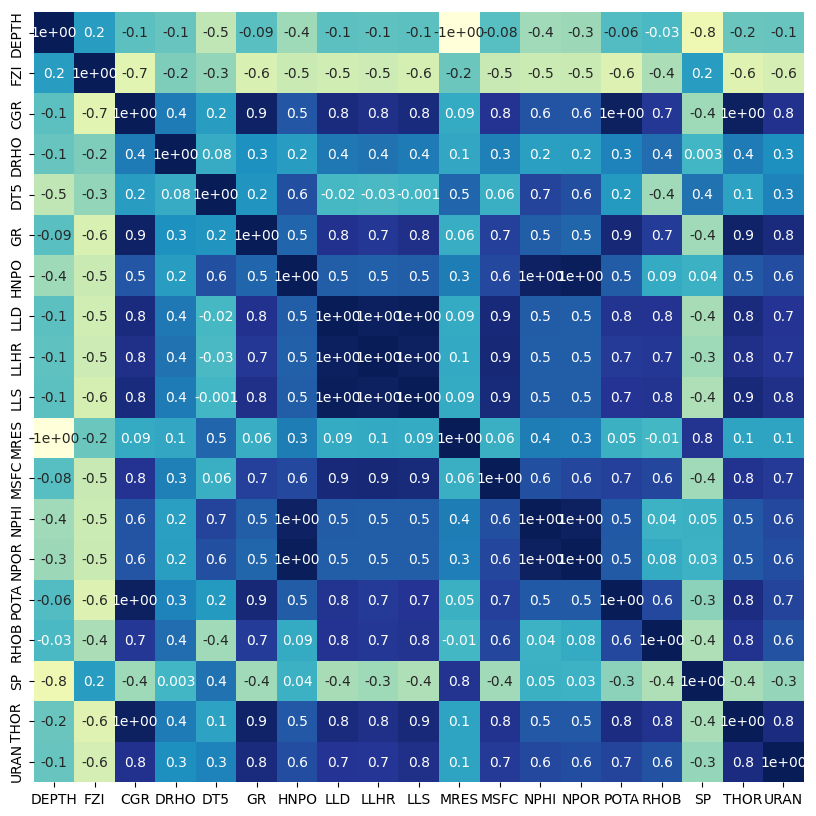

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap= "YlGnBu", cbar= False, annot= True, square= True, fmt= '.1')

In [14]:
df.columns

Index(['DEPTH', 'FZI', 'CGR', 'DRHO', 'DT5', 'GR', 'HNPO', 'LLD', 'LLHR',
       'LLS', 'MRES', 'MSFC', 'NPHI', 'NPOR', 'POTA', 'RHOB', 'SP', 'THOR',
       'URAN'],
      dtype='object')

In [30]:
df2 = df.drop(columns = ['DEPTH', 'DRHO', 'DT5', 'GR', 'HNPO', 'LLD',
                         'LLS', 'MRES', 'MSFC', 'POTA', 'RHOB', 'SP',
                         'URAN'])

In [31]:
df2.head()

,FZI,CGR,LLHR,NPHI,NPOR,THOR
0,211.121914,31.992576,1.989065,0.179966,0.179166,2.646898
1,288.431455,31.976041,1.984340,0.184376,0.181292,2.688867
2,274.592462,36.236242,1.827785,0.187421,0.179666,2.949177
3,497.852972,42.122592,1.893686,0.185625,0.182018,3.316663
4,184.453837,42.361279,2.136641,0.184468,0.185889,3.220796


In [35]:
X = df2.drop(columns="FZI")
y = df2.FZI

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 5), (64, 5), (148,), (64,))

In [36]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', transform= 'yeo-johnson' , poly = 2), X.columns )])


from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=3, n_iter=50,  n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

/usr/local/lib/python3.9/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 21, 'algo__max_features': 0.26364247048639056, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 175, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': False}
0.9663099484960201 0.7458673177016811 0.746867163345839


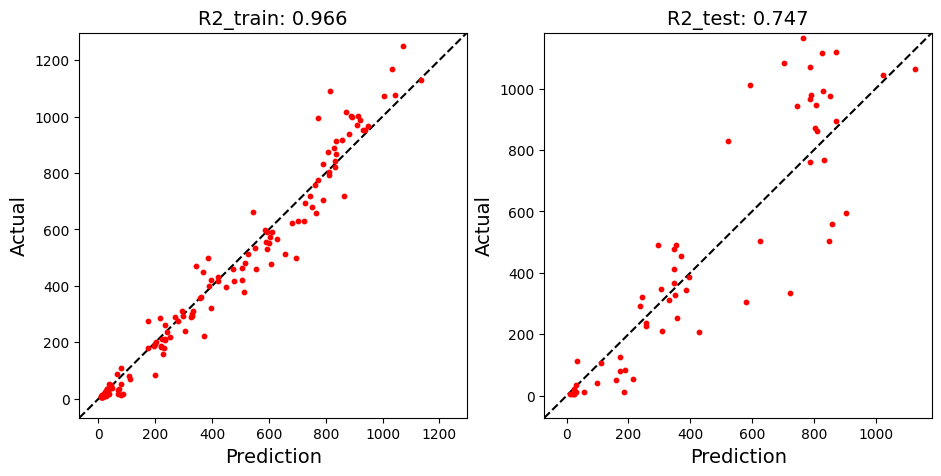

In [37]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_RF)

In [38]:
from sklearn.svm import SVR

In [46]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust', transform = 'yeo-johnson', poly = 3), X.columns )])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_SVM = RandomizedSearchCV(pipeline, rsp.svm_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM.fit(X_train, y_train)

print(model_SVM.best_params_)
print(model_SVM.score(X_train, y_train), model_SVM.best_score_, model_SVM.score(X_test, y_test))

/usr/local/lib/python3.9/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 276.03912956530075, 'algo__gamma': 0.04293322340412749, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.8116210983759284 0.7112945228656965 0.6595048243839502


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


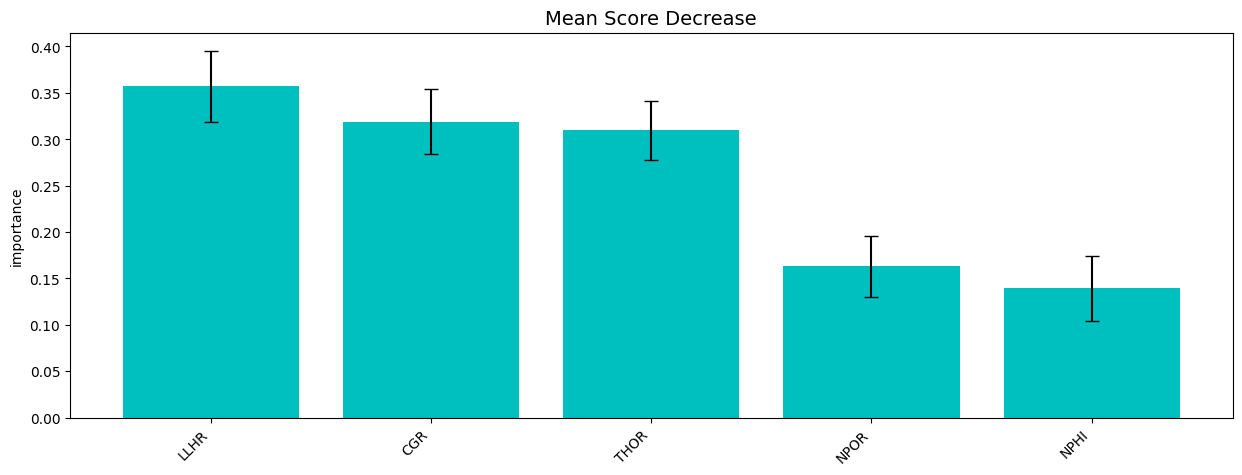

In [47]:
df_imp = mean_score_decrease(X_train, y_train, model_SVM, plot=True, topk = 10)

In [50]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly = 2, transform='yeo-johnson', scaling='robust'), X.columns )])


from xgboost import XGBRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model_XGB = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_XGB.fit(X_train, y_train)

print(model_XGB.best_params_)
print(model_XGB.score(X_train, y_train), model_XGB.best_score_, model_XGB.score(X_test, y_test))

/usr/local/lib/python3.9/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.48875051677790426, 'algo__gamma': 1, 'algo__learning_rate': 0.11208547084229371, 'algo__max_depth': 10, 'algo__n_estimators': 191, 'algo__reg_alpha': 7.852755494724264, 'algo__reg_lambda': 0.008532678095658717, 'algo__subsample': 0.3453032172664104, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.9998539526499025 0.7734441664541207 0.7324224506966399
